# Correlations in AR models

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [88]:
def ar_function(p, n, phi, c, burnin=0):
    yt = np.zeros(n)
    eps = np.random.normal(0, 1, n + p)
    yt[:p] = eps[:p]
    for i in range(p, n):
        yt[i] = c + np.dot(phi, yt[i-p:i][::-1]) + eps[i]
    return yt[burnin:]

In [89]:
n = 5000
c = 18
burnin = 1000
phi_values = [-0.6, -0.7, -0.8, -0.9]

# AR(1) process

C:\Users\Marcin\AppData\Local\Temp\ipykernel_11596\2786197745.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yt[i] = c + np.dot(phi, yt[i-p:i][::-1]) + eps[i]


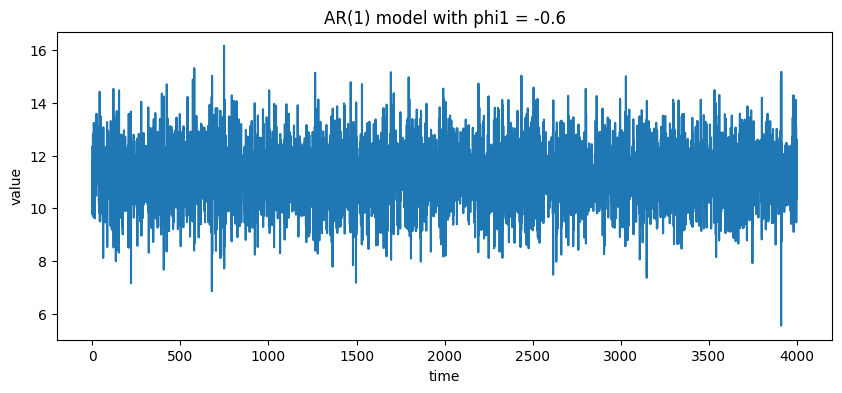

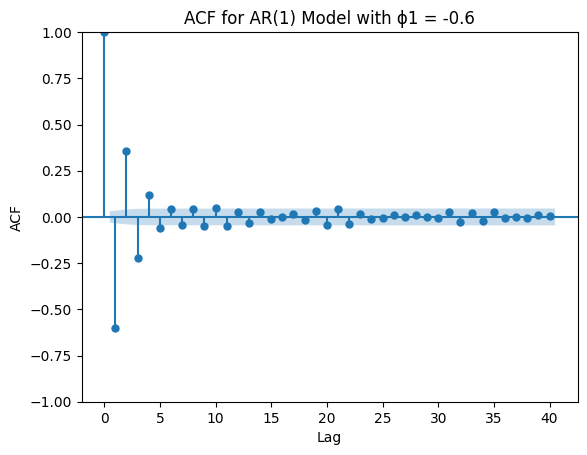

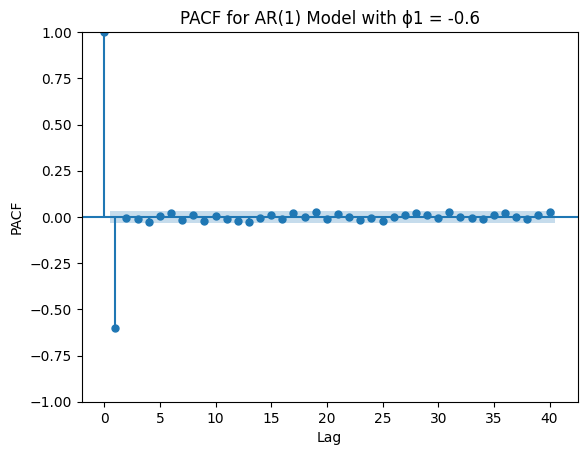

For phi1 = -0.6: The generated time series is stationary.


C:\Users\Marcin\AppData\Local\Temp\ipykernel_11596\2786197745.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yt[i] = c + np.dot(phi, yt[i-p:i][::-1]) + eps[i]


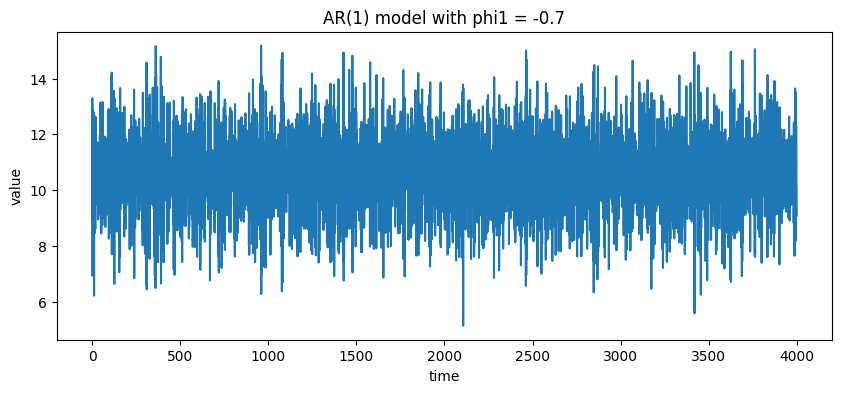

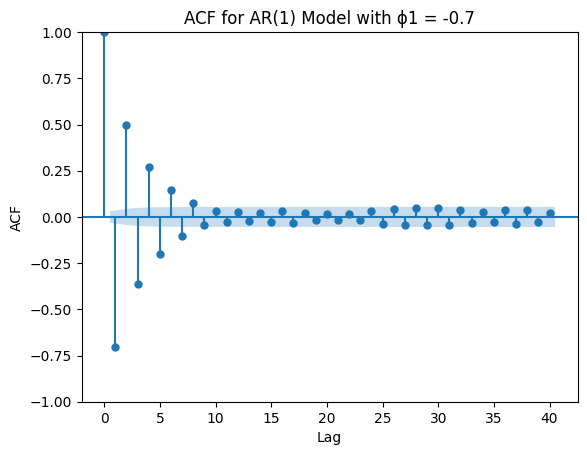

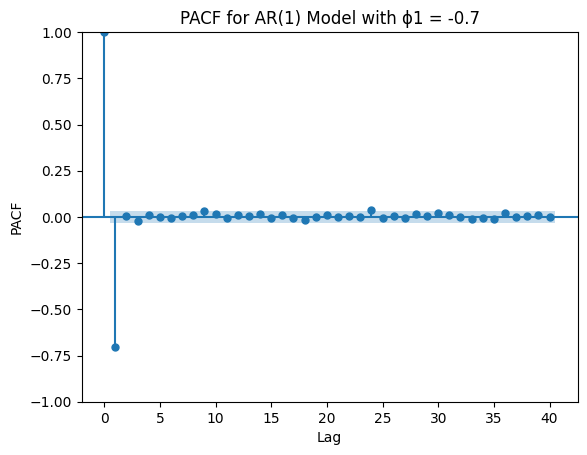

For phi1 = -0.7: The generated time series is stationary.


C:\Users\Marcin\AppData\Local\Temp\ipykernel_11596\2786197745.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yt[i] = c + np.dot(phi, yt[i-p:i][::-1]) + eps[i]


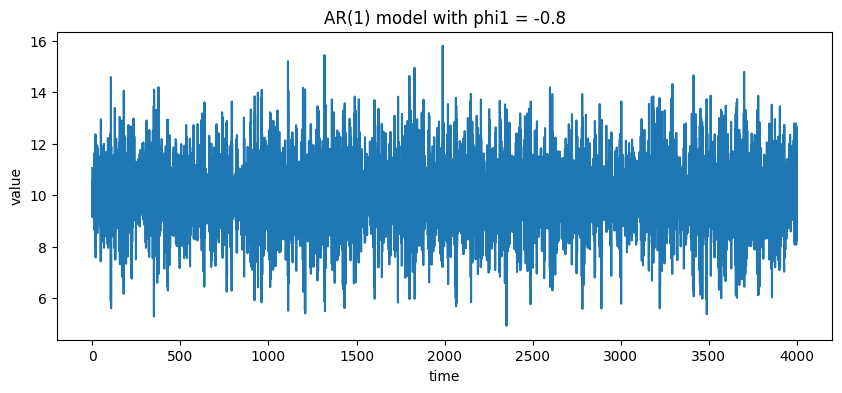

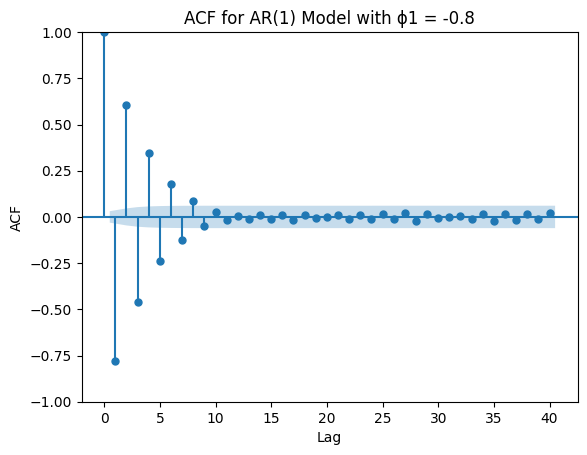

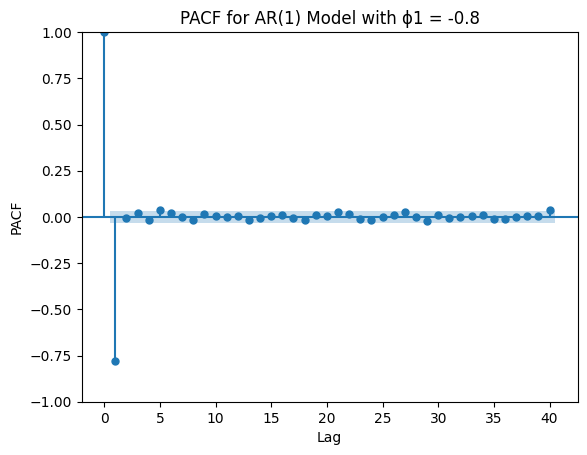

For phi1 = -0.8: The generated time series is stationary.


C:\Users\Marcin\AppData\Local\Temp\ipykernel_11596\2786197745.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yt[i] = c + np.dot(phi, yt[i-p:i][::-1]) + eps[i]


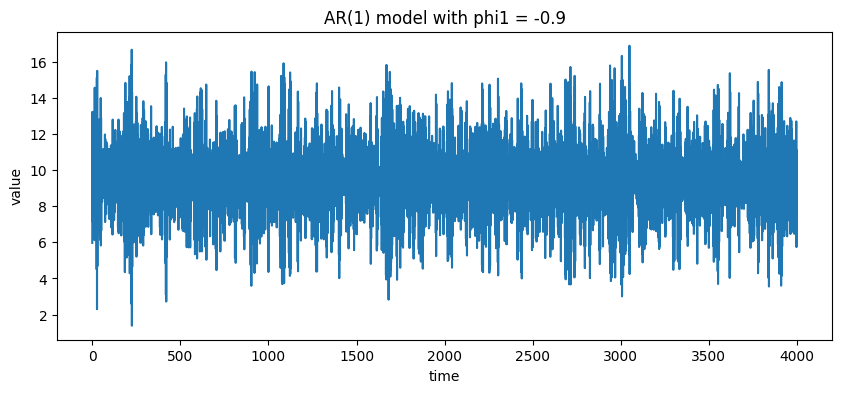

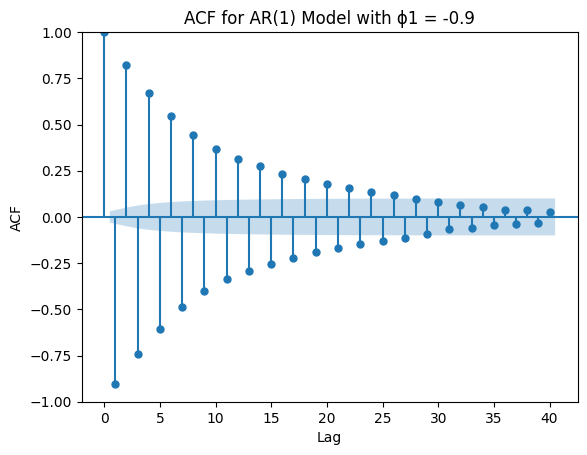

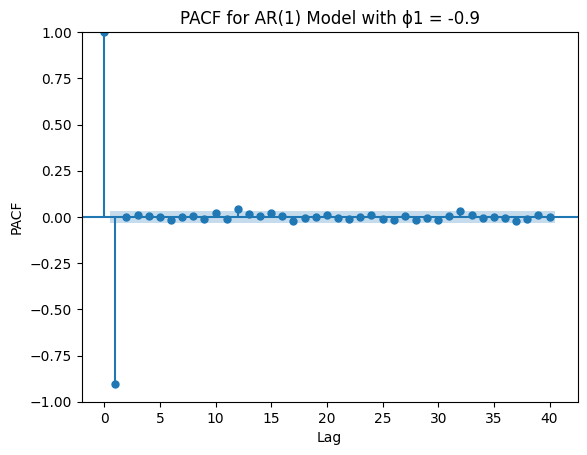

For phi1 = -0.9: The generated time series is stationary.


In [90]:
for phi in phi_values:
    yt_ar1 = ar_function(1, n, phi, c, burnin)
    plt.figure(figsize=(10, 4))
    plt.plot(yt_ar1)
    plt.title(f'AR(1) model with phi1 = {phi}')
    plt.xlabel('time')
    plt.ylabel('value')
    plt.show()

    # Calculate and plot ACF and PACF
    plot_acf(yt_ar1, lags=40, title=f'ACF for AR(1) Model with ϕ1 = {phi}')
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.show()

    plot_pacf(yt_ar1, lags=40, title=f'PACF for AR(1) Model with ϕ1 = {phi}')
    plt.xlabel('Lag')
    plt.ylabel('PACF')
    plt.show()

    # Check for stationarity
    if abs(phi) < 1:
        print(f"For phi1 = {phi}: The generated time series is stationary.")
    else:
        print(f"For phi1 = {phi}: The generated time series is not stationary.")

    

# AR(2) process

In [91]:
phi1 = 1.3
phi2 = -0.7
c = 8
yt_ar2 = ar_function(2, n, [phi1, phi2], c, burnin)

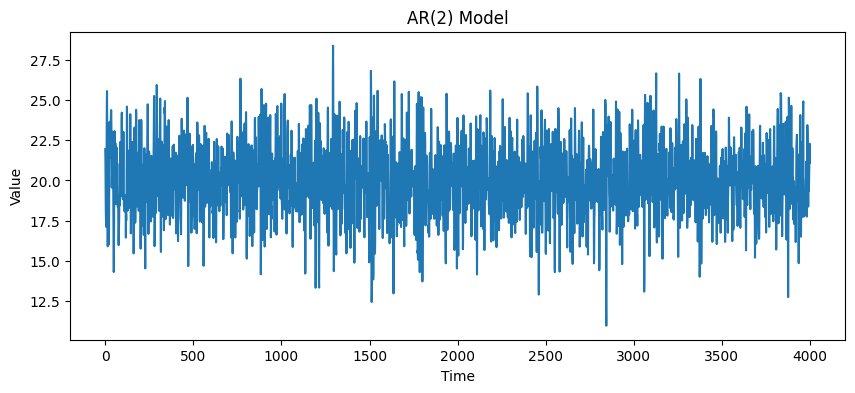

In [92]:
plt.figure(figsize=(10, 4))
plt.plot(yt_ar2)
plt.title('AR(2) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

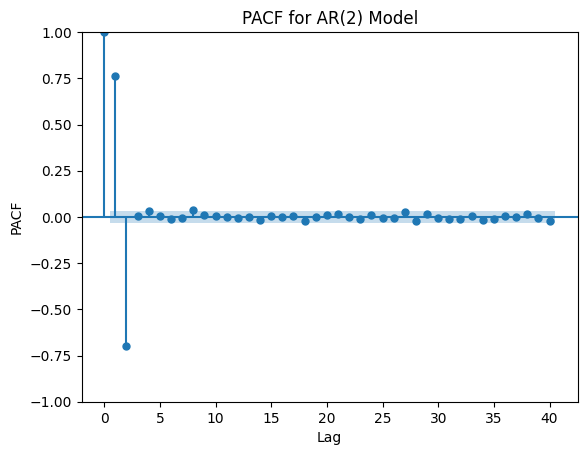

In [93]:
# Calculate and plot PACF for AR(2) model
plot_pacf(yt_ar2, lags=40, title='PACF for AR(2) Model')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

Compare the structures of the PACFs for AR(1) and AR(2) models

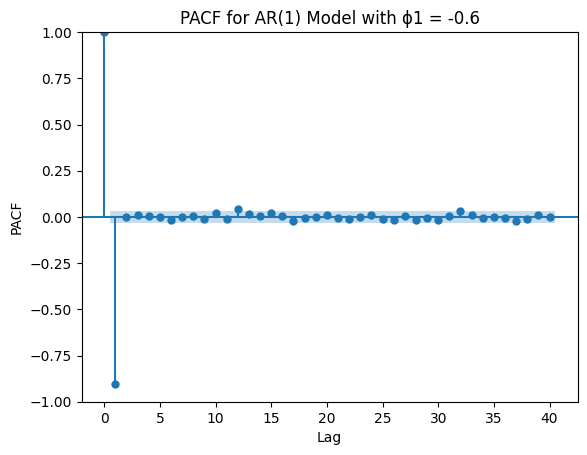

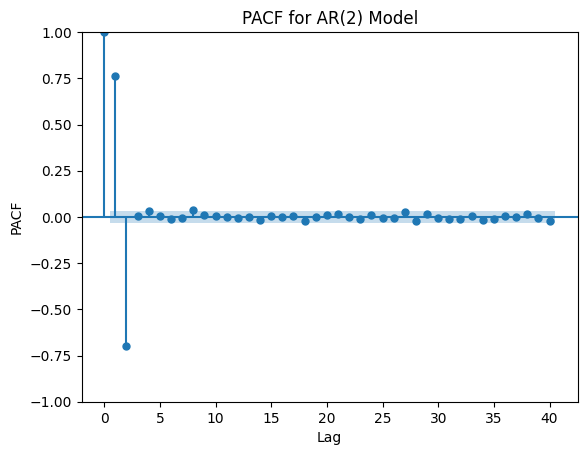

In [94]:
pacf_ar1 = plot_pacf(yt_ar1, lags=40, title='PACF for AR(1) Model with ϕ1 = -0.6', alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('PACF')

pacf_ar2 = plot_pacf(yt_ar2, lags=40, title='PACF for AR(2) Model', alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('PACF')

plt.show()

Conclusions:
 - We can spot that AR(2) exhibits more complex autocorellation patterns than AR(1) model
 - We can observe that first lag in AR(1) model shows stronger correlation than in AR(2). However in case of lag 2 it is reversed.
 - We can observe decrease in correlation in AR(2) model after lag 2

# Correlations in MA models

In [95]:
def generate_MA(q, n, theta, c, burnin=0):
    yt = np.zeros(n)
    eps = np.random.normal(0, 1, n + q)
    yt[:q] = eps[:q]  # Initialize with random noise
    for i in range(q, n):
        yt[i] = c + np.dot(theta, eps[i-q:i][::-1]) + eps[i]
    return yt[burnin:]

In [96]:
n = 5000
c = 20
theta_ma1 = [0.8]
yt_ma1 = generate_MA(1, n, theta_ma1, c)

Plot of the time series

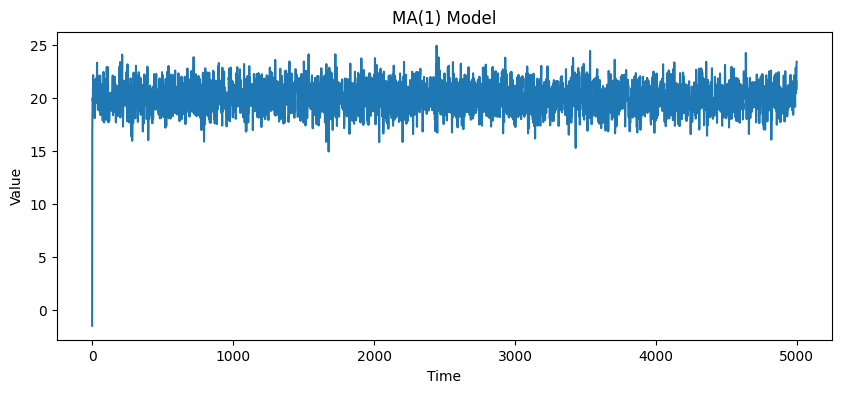

In [97]:
plt.figure(figsize=(10, 4))
plt.plot(yt_ma1)
plt.title('MA(1) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Calculate and plot ACF and PACF for MA(1) model

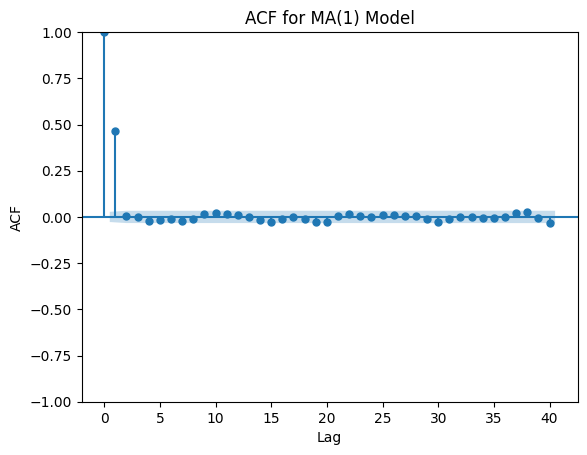

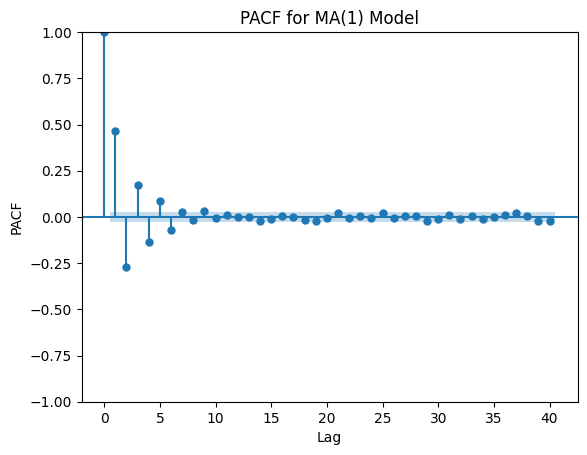

In [98]:
plot_acf(yt_ma1, lags=40, title='ACF for MA(1) Model')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plot_pacf(yt_ma1, lags=40, title='PACF for MA(1) Model')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

Repeat the calculations for the MA(2) model 

In [99]:
theta_ma2 = [1, 0.8]
n = 5000
c = np.random.normal(0, 1) # c is our epsilon now
yt_ma2 = generate_MA(2, n, theta_ma2, c)

Time series for MA(2) model

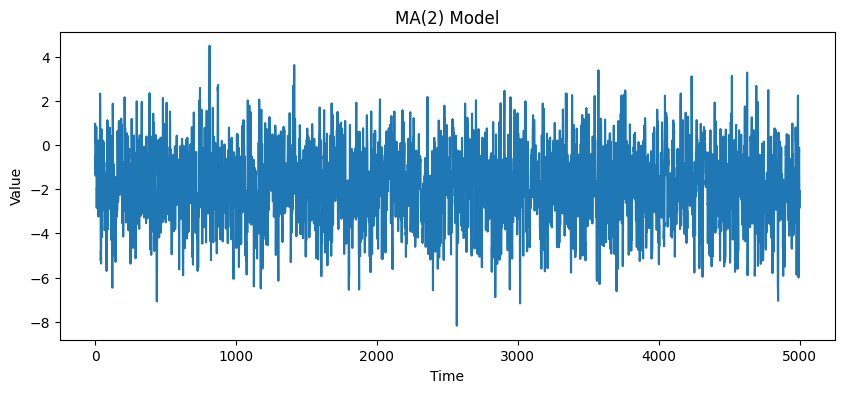

In [100]:
plt.figure(figsize=(10, 4))
plt.plot(yt_ma2)
plt.title('MA(2) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Calculate and plot ACF and PACF for MA(2) model

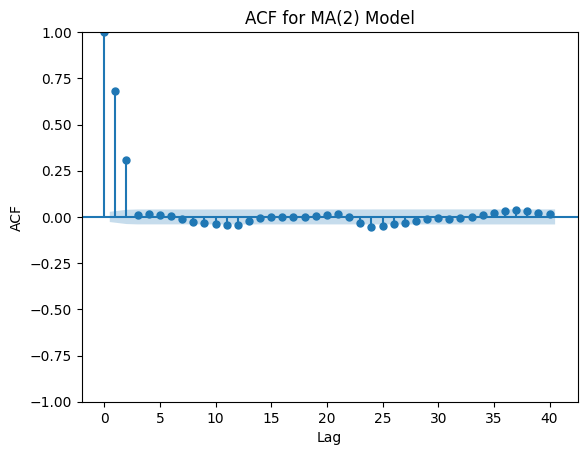

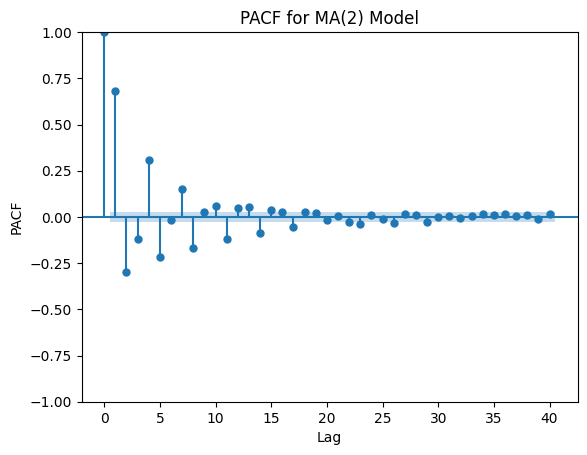

In [101]:
plot_acf(yt_ma2, lags=40, title='ACF for MA(2) Model')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plot_pacf(yt_ma2, lags=40, title='PACF for MA(2) Model')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

Compare the structures of ACF/PACF for AR and MA models.

Plot ACF and PACF for AR(1) model

<Figure size 1500x500 with 0 Axes>

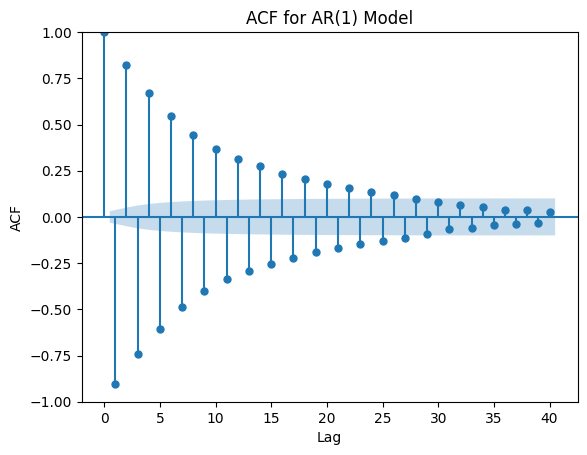

<Figure size 1500x500 with 0 Axes>

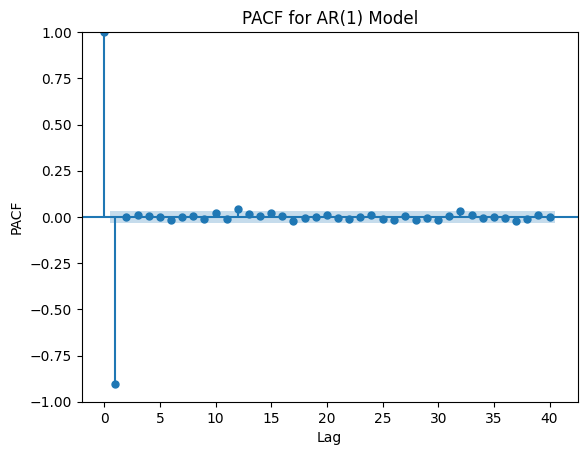

In [102]:
plt.figure(figsize=(15, 5))
plot_acf(yt_ar1, lags=40, title='ACF for AR(1) Model')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(15, 5))
plot_pacf(yt_ar1, lags=40, title='PACF for AR(1) Model')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

Plot ACF and PACF for MA(1) model

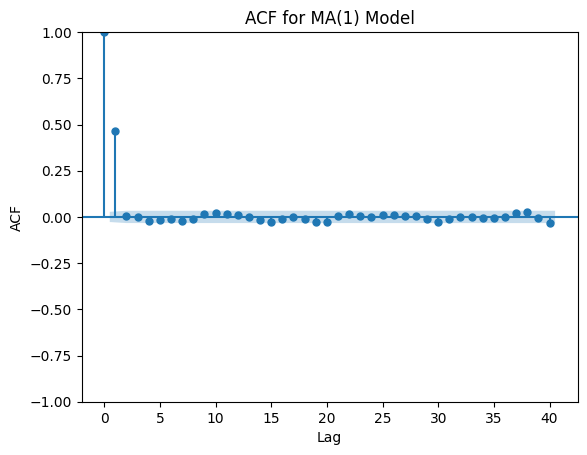

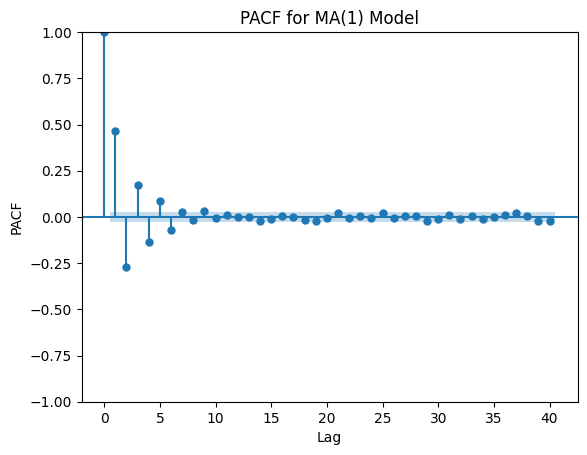

In [103]:
plot_acf(yt_ma1, lags=40, title='ACF for MA(1) Model')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plot_pacf(yt_ma1, lags=40, title='PACF for MA(1) Model')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

Plot ACF and PACF for AR(2) model

<Figure size 1500x500 with 0 Axes>

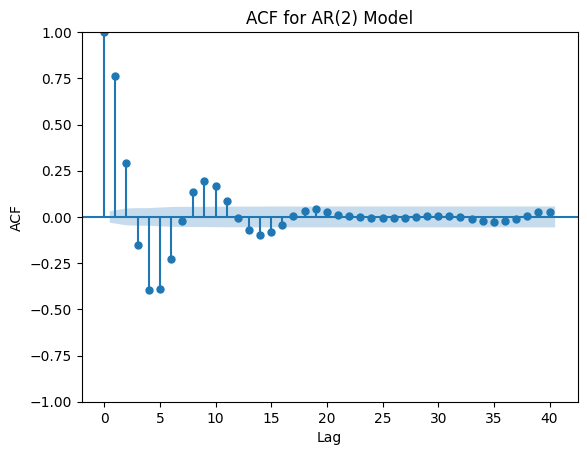

<Figure size 1500x500 with 0 Axes>

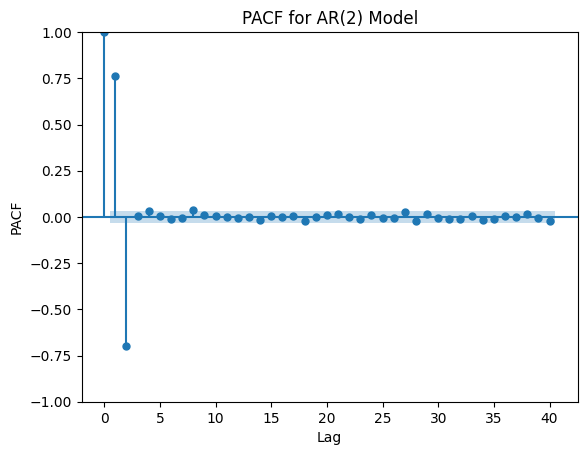

In [104]:
plt.figure(figsize=(15, 5))
plot_acf(yt_ar2, lags=40, title='ACF for AR(2) Model')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(15, 5))
plot_pacf(yt_ar2, lags=40, title='PACF for AR(2) Model')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

Plot ACF and PACF for MA(2) model

<Figure size 1200x600 with 0 Axes>

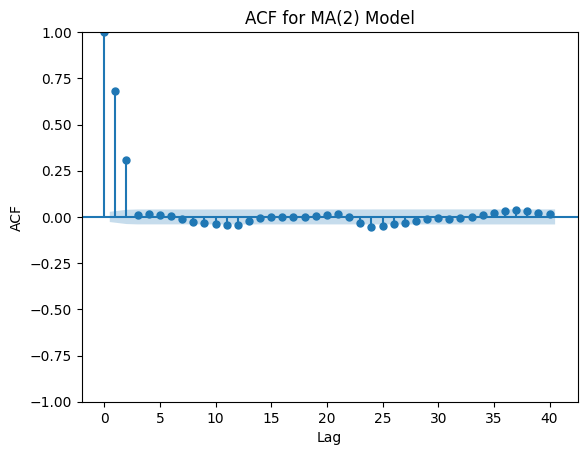

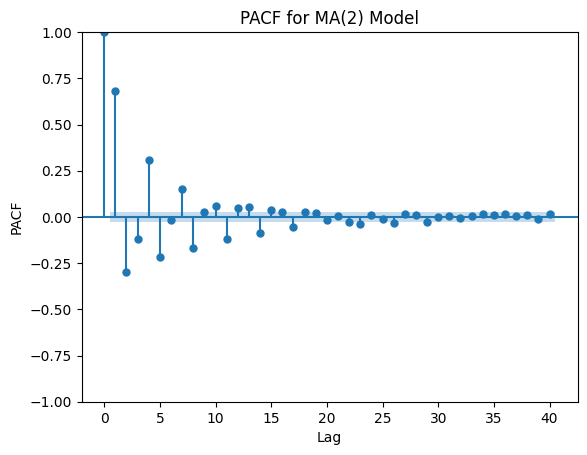

In [105]:
plt.figure(figsize=(12, 6))
plot_acf(yt_ma2, lags=40, title='ACF for MA(2) Model')
plt.xlabel('Lag')
plt.ylabel('ACF')

plot_pacf(yt_ma2, lags=40, title='PACF for MA(2) Model')
plt.xlabel('Lag')
plt.ylabel('PACF')

plt.show()

Conclusions:
- AR Models: Show significant autocorrelation at lag 1 in the ACF and a sharp cutoff in the PACF, indicating a direct influence from the previous observation(s).
- MA Models: Exhibit a sharp cutoff in the ACF and exponential decay in the PACF, indicating that observations are influenced by the previous error terms rather than the previous observations directly.
- Comparing ACF and PACF: While both AR and MA models exhibit similar behaviors in terms of ACF and PACF, they have distinct patterns. AR models show significant autocorrelation in ACF and a sharp cutoff in PACF, while MA models show the opposite.